In [1]:
import pandas as pd
df = pd.read_table("/common/zhangz2lab/zhanh/MFASS/processed_data/snv/snv_data_clean.txt")
df_columns = df[['ref_allele', 'alt_allele', 'original_seq', 'label', 'start', 'end','rel_position','strand','v2_dpsi','v2_dpsi_R1','v2_dpsi_R2']]
print(df_columns)
print(df.columns)

      ref_allele alt_allele  \
0            NaN        NaN   
1              C          T   
2            NaN        NaN   
3              C          T   
4              C          T   
...          ...        ...   
32664          C          T   
32665          T          C   
32666          G          C   
32667          G          C   
32668          G          A   

                                            original_seq           label  \
0      GAGGGAGCATGCTTCAGGCAGCCCTTCCGGCATCTACCAGCCATGC...             NaN   
1      GAGGGAGCATGCTTCAGGCAGCCCTTCCAGCATCTACCAGCCATGC...    upstr_intron   
2      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...             NaN   
3      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
4      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
...                                                  ...             ...   
32664  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...  downstr_intron   
32665  CTTTGCTCACTT

In [2]:
df_rows = df_columns.dropna(subset=['label'])
df_rows = df_rows.dropna(subset=['rel_position'])
df_rows = df_rows.dropna(subset=['ref_allele'])
df_rows = df_rows.dropna(subset=['alt_allele'])
df_rows = df_rows.dropna(subset=['original_seq'])
df_rows = df_rows.dropna(subset=['start'])
df_rows = df_rows.dropna(subset=['end'])
df_rows = df_rows.dropna(subset=['v2_dpsi'])
df_rows = df_rows.dropna(subset=['v2_dpsi_R1'])
df_rows = df_rows.dropna(subset=['v2_dpsi_R2'])
#df_rows = df_rows.dropna(subset=['v1_dpsi'])
#df_rows = df_rows[df_rows['strand'] != '+']
print(df_rows)

      ref_allele alt_allele  \
1              C          T   
3              C          T   
4              C          T   
5              G          T   
6              G          A   
...          ...        ...   
32664          C          T   
32665          T          C   
32666          G          C   
32667          G          C   
32668          G          A   

                                            original_seq           label  \
1      GAGGGAGCATGCTTCAGGCAGCCCTTCCAGCATCTACCAGCCATGC...    upstr_intron   
3      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
4      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
5      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...            exon   
6      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...            exon   
...                                                  ...             ...   
32664  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...  downstr_intron   
32665  CTTTGCTCACTT

In [ ]:
def check_allele(row):
    sequence_position = int(row['rel_position']) -1
    # Check if the position is within the sequence length
    if 0 <= sequence_position < len(row['original_seq']):
        return row['original_seq'][sequence_position] == row['ref_allele']
    else:
        return False  # For positions outside the sequence

df_rows['is_ref_allele_correct'] = df_rows.apply(check_allele, axis=1)
print(df_rows)
true_false_counts = df_rows['is_ref_allele_correct'].value_counts(dropna=False)
print(true_false_counts)

In [ ]:
def check_allele(row):
    sequence_position = int(row['end']) - int(row['start'])- int(row['rel_position'])
    # Check if the position is within the sequence length
    if 0 <= sequence_position < len(row['original_seq']):
        return row['original_seq'][sequence_position] == row['ref_allele']
    else:
        return False  # For positions outside the sequence

df_rows['is_ref_allele_correct'] = df_rows.apply(check_allele, axis=1)
print(df_rows)
true_false_counts = df_rows['is_ref_allele_correct'].value_counts(dropna=False)
print(true_false_counts)

In [ ]:
def reverse_complement(seq):
    complement = {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G'}
    return ''.join(complement.get(base, base) for base in reversed(seq))

def map_ref_allele(ref_allele):
    mapping = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return mapping.get(ref_allele, ref_allele)  # Returns the original allele if not A, T, G, or C

def check_allele(row):
    sequence_position = int(row['end']) - int(row['start']) - int(row['rel_position']) 

    if 0 <= sequence_position < len(row['original_seq']):
        if row['strand'] == '-':
            ref_allele = map_ref_allele(row['ref_allele'])
            allele_at_position = row['original_seq'][sequence_position]
            #allele_at_position = reverse_complement(row['original_seq'])[sequence_position]
        else:
            ref_allele = row['ref_allele']
            allele_at_position = row['original_seq'][sequence_position]

        return allele_at_position == ref_allele
    else:
        return False 

df_rows['is_ref_allele_correct'] = df_rows.apply(check_allele, axis=1)
print(df_rows)
true_false_counts = df_rows['is_ref_allele_correct'].value_counts(dropna=False)
print(true_false_counts)


In [3]:
def map_ref_allele(ref_allele):
    mapping = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return mapping.get(ref_allele, ref_allele)  # Returns the original allele if not A, T, G, or C

def check_allele(row):
    sequence_position = int(row['rel_position']) -1

    # Check if the position is within the sequence length
    if 0 <= sequence_position < len(row['original_seq']):
        if row['strand'] == '-':
            ref_allele = map_ref_allele(row['alt_allele'])
            allele_at_position = row['original_seq'][sequence_position]
        else:
            # Use the sequence directly for positive strand
            ref_allele = row['alt_allele']
            allele_at_position = row['original_seq'][sequence_position]
        return allele_at_position == ref_allele
    else:
        return False  # For positions outside the sequence
    
df_rows['seq_a'] = df_rows['original_seq']
df_rows['is_ref_allele_correct'] = df_rows.apply(check_allele, axis=1)
print(df_rows)
true_false_counts = df_rows['is_ref_allele_correct'].value_counts(dropna=False)
print(true_false_counts)

      ref_allele alt_allele  \
1              C          T   
3              C          T   
4              C          T   
5              G          T   
6              G          A   
...          ...        ...   
32664          C          T   
32665          T          C   
32666          G          C   
32667          G          C   
32668          G          A   

                                            original_seq           label  \
1      GAGGGAGCATGCTTCAGGCAGCCCTTCCAGCATCTACCAGCCATGC...    upstr_intron   
3      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
4      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
5      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...            exon   
6      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...            exon   
...                                                  ...             ...   
32664  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...  downstr_intron   
32665  CTTTGCTCACTT

In [4]:
def modify_seq_a(row):
    sequence_position = int(row['rel_position']) - 1
    new_sequence = list(row['seq_a'])  # Convert the sequence to a list for modification

    if 0 <= sequence_position < len(row['original_seq']):
        if row['strand'] == '-':
            # For negative strand, use mapped allele
            new_allele =  map_ref_allele(row['ref_allele'])
        else:
            # For positive strand, use alt_allele directly
            new_allele = row['ref_allele']

        new_sequence[sequence_position] = new_allele  # Replace the allele at the specific position

    return ''.join(new_sequence)  # Convert the list back to a string
df_rows['seq_a'] = df_rows.apply(modify_seq_a, axis=1)
print(df_rows)

      ref_allele alt_allele  \
1              C          T   
3              C          T   
4              C          T   
5              G          T   
6              G          A   
...          ...        ...   
32664          C          T   
32665          T          C   
32666          G          C   
32667          G          C   
32668          G          A   

                                            original_seq           label  \
1      GAGGGAGCATGCTTCAGGCAGCCCTTCCAGCATCTACCAGCCATGC...    upstr_intron   
3      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
4      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
5      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...            exon   
6      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...            exon   
...                                                  ...             ...   
32664  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...  downstr_intron   
32665  CTTTGCTCACTT

In [5]:
def print_replacements(df):
    for index, row in df.iterrows():
        # Convert both sequences to lists for easier comparison
        original_seq_list = list(row['original_seq'])
        seq_a_list = list(row['seq_a'])

        # Check each position for a difference
        for position in range(len(original_seq_list)):
            if original_seq_list[position] != seq_a_list[position]:
                original_allele = original_seq_list[position]
                replaced_allele = seq_a_list[position]
                print(f"Row {index}: Original Allele: {original_allele} Replaced With: {replaced_allele} at Position: {position}")

# Call the function on df_rows
print(print_replacements(df_rows))


Row 1: Original Allele: A Replaced With: G at Position: 28
Row 3: Original Allele: A Replaced With: G at Position: 150
Row 4: Original Allele: A Replaced With: G at Position: 146
Row 5: Original Allele: A Replaced With: C at Position: 106
Row 6: Original Allele: T Replaced With: C at Position: 96
Row 7: Original Allele: A Replaced With: G at Position: 93
Row 8: Original Allele: A Replaced With: T at Position: 88
Row 9: Original Allele: C Replaced With: A at Position: 70
Row 10: Original Allele: G Replaced With: A at Position: 63
Row 11: Original Allele: G Replaced With: A at Position: 61
Row 12: Original Allele: G Replaced With: A at Position: 48
Row 13: Original Allele: C Replaced With: T at Position: 24
Row 14: Original Allele: C Replaced With: A at Position: 20
Row 15: Original Allele: G Replaced With: A at Position: 18
Row 17: Original Allele: C Replaced With: T at Position: 16
Row 18: Original Allele: T Replaced With: C at Position: 22
Row 19: Original Allele: A Replaced With: C a

Row 2385: Original Allele: C Replaced With: T at Position: 65
Row 2386: Original Allele: T Replaced With: A at Position: 64
Row 2387: Original Allele: T Replaced With: C at Position: 62
Row 2388: Original Allele: G Replaced With: A at Position: 53
Row 2389: Original Allele: A Replaced With: T at Position: 42
Row 2390: Original Allele: C Replaced With: A at Position: 41
Row 2391: Original Allele: A Replaced With: C at Position: 36
Row 2392: Original Allele: G Replaced With: A at Position: 30
Row 2393: Original Allele: T Replaced With: G at Position: 27
Row 2394: Original Allele: A Replaced With: C at Position: 19
Row 2395: Original Allele: T Replaced With: C at Position: 19
Row 2398: Original Allele: T Replaced With: C at Position: 158
Row 2399: Original Allele: T Replaced With: C at Position: 150
Row 2400: Original Allele: A Replaced With: G at Position: 136
Row 2401: Original Allele: T Replaced With: C at Position: 127
Row 2402: Original Allele: T Replaced With: C at Position: 123
Row

Row 5288: Original Allele: T Replaced With: A at Position: 140
Row 5289: Original Allele: G Replaced With: A at Position: 135
Row 5290: Original Allele: C Replaced With: G at Position: 126
Row 5291: Original Allele: A Replaced With: G at Position: 107
Row 5292: Original Allele: A Replaced With: G at Position: 57
Row 5293: Original Allele: A Replaced With: G at Position: 42
Row 5294: Original Allele: C Replaced With: G at Position: 38
Row 5295: Original Allele: A Replaced With: C at Position: 34
Row 5296: Original Allele: A Replaced With: G at Position: 19
Row 5297: Original Allele: G Replaced With: C at Position: 18
Row 5298: Original Allele: T Replaced With: A at Position: 10
Row 5300: Original Allele: A Replaced With: C at Position: 158
Row 5301: Original Allele: G Replaced With: A at Position: 154
Row 5302: Original Allele: A Replaced With: G at Position: 150
Row 5303: Original Allele: A Replaced With: G at Position: 136
Row 5305: Original Allele: T Replaced With: C at Position: 122

Row 7737: Original Allele: G Replaced With: A at Position: 143
Row 7738: Original Allele: T Replaced With: C at Position: 144
Row 7741: Original Allele: T Replaced With: C at Position: 144
Row 7742: Original Allele: A Replaced With: G at Position: 128
Row 7743: Original Allele: C Replaced With: T at Position: 37
Row 7744: Original Allele: C Replaced With: T at Position: 10
Row 7747: Original Allele: T Replaced With: C at Position: 154
Row 7748: Original Allele: G Replaced With: C at Position: 142
Row 7749: Original Allele: G Replaced With: A at Position: 129
Row 7750: Original Allele: A Replaced With: G at Position: 117
Row 7751: Original Allele: A Replaced With: G at Position: 116
Row 7752: Original Allele: T Replaced With: G at Position: 109
Row 7753: Original Allele: T Replaced With: A at Position: 105
Row 7754: Original Allele: A Replaced With: C at Position: 103
Row 7755: Original Allele: G Replaced With: C at Position: 103
Row 7756: Original Allele: C Replaced With: T at Position

Row 10225: Original Allele: G Replaced With: A at Position: 146
Row 10226: Original Allele: T Replaced With: C at Position: 142
Row 10227: Original Allele: C Replaced With: T at Position: 125
Row 10228: Original Allele: G Replaced With: A at Position: 90
Row 10229: Original Allele: A Replaced With: G at Position: 77
Row 10230: Original Allele: T Replaced With: C at Position: 76
Row 10231: Original Allele: T Replaced With: C at Position: 74
Row 10232: Original Allele: G Replaced With: A at Position: 42
Row 10233: Original Allele: A Replaced With: G at Position: 40
Row 10234: Original Allele: T Replaced With: G at Position: 22
Row 10235: Original Allele: T Replaced With: C at Position: 21
Row 10238: Original Allele: G Replaced With: A at Position: 146
Row 10240: Original Allele: A Replaced With: G at Position: 159
Row 10241: Original Allele: T Replaced With: C at Position: 150
Row 10242: Original Allele: A Replaced With: G at Position: 146
Row 10243: Original Allele: T Replaced With: C a

Row 12226: Original Allele: C Replaced With: T at Position: 77
Row 12227: Original Allele: G Replaced With: C at Position: 78
Row 12228: Original Allele: A Replaced With: G at Position: 101
Row 12229: Original Allele: T Replaced With: C at Position: 110
Row 12230: Original Allele: G Replaced With: A at Position: 138
Row 12231: Original Allele: C Replaced With: A at Position: 149
Row 12234: Original Allele: A Replaced With: G at Position: 53
Row 12235: Original Allele: A Replaced With: G at Position: 110
Row 12236: Original Allele: T Replaced With: C at Position: 127
Row 12237: Original Allele: G Replaced With: C at Position: 144
Row 12238: Original Allele: A Replaced With: C at Position: 157
Row 12241: Original Allele: A Replaced With: C at Position: 12
Row 12242: Original Allele: T Replaced With: C at Position: 13
Row 12243: Original Allele: G Replaced With: T at Position: 22
Row 12244: Original Allele: C Replaced With: A at Position: 56
Row 12245: Original Allele: A Replaced With: G 

Row 14545: Original Allele: C Replaced With: T at Position: 45
Row 14546: Original Allele: G Replaced With: C at Position: 56
Row 14548: Original Allele: C Replaced With: G at Position: 72
Row 14549: Original Allele: T Replaced With: C at Position: 86
Row 14551: Original Allele: A Replaced With: T at Position: 115
Row 14552: Original Allele: C Replaced With: G at Position: 137
Row 14553: Original Allele: G Replaced With: C at Position: 141
Row 14555: Original Allele: T Replaced With: C at Position: 151
Row 14558: Original Allele: A Replaced With: G at Position: 50
Row 14559: Original Allele: T Replaced With: C at Position: 20
Row 14561: Original Allele: C Replaced With: T at Position: 37
Row 14563: Original Allele: A Replaced With: C at Position: 50
Row 14564: Original Allele: A Replaced With: G at Position: 84
Row 14565: Original Allele: A Replaced With: G at Position: 101
Row 14566: Original Allele: A Replaced With: G at Position: 113
Row 14567: Original Allele: A Replaced With: G at

Row 17049: Original Allele: T Replaced With: C at Position: 17
Row 17050: Original Allele: T Replaced With: G at Position: 11
Row 17053: Original Allele: A Replaced With: G at Position: 139
Row 17054: Original Allele: G Replaced With: A at Position: 132
Row 17055: Original Allele: T Replaced With: C at Position: 114
Row 17056: Original Allele: A Replaced With: G at Position: 81
Row 17057: Original Allele: T Replaced With: G at Position: 81
Row 17058: Original Allele: C Replaced With: T at Position: 69
Row 17059: Original Allele: G Replaced With: A at Position: 68
Row 17060: Original Allele: G Replaced With: C at Position: 62
Row 17061: Original Allele: T Replaced With: C at Position: 52
Row 17062: Original Allele: G Replaced With: A at Position: 50
Row 17064: Original Allele: T Replaced With: A at Position: 42
Row 17065: Original Allele: C Replaced With: T at Position: 11
Row 17066: Original Allele: A Replaced With: G at Position: 10
Row 17068: Original Allele: A Replaced With: G at Po

Row 19612: Original Allele: G Replaced With: C at Position: 152
Row 19613: Original Allele: A Replaced With: C at Position: 156
Row 19614: Original Allele: T Replaced With: C at Position: 158
Row 19615: Original Allele: T Replaced With: C at Position: 159
Row 19617: Original Allele: T Replaced With: C at Position: 18
Row 19618: Original Allele: C Replaced With: T at Position: 44
Row 19619: Original Allele: G Replaced With: C at Position: 50
Row 19620: Original Allele: T Replaced With: C at Position: 50
Row 19621: Original Allele: G Replaced With: C at Position: 52
Row 19622: Original Allele: T Replaced With: C at Position: 114
Row 19623: Original Allele: T Replaced With: G at Position: 115
Row 19624: Original Allele: A Replaced With: G at Position: 115
Row 19626: Original Allele: T Replaced With: C at Position: 124
Row 19627: Original Allele: A Replaced With: G at Position: 125
Row 19628: Original Allele: A Replaced With: C at Position: 139
Row 19629: Original Allele: G Replaced With: 

Row 22574: Original Allele: T Replaced With: C at Position: 45
Row 22575: Original Allele: T Replaced With: C at Position: 55
Row 22576: Original Allele: T Replaced With: C at Position: 56
Row 22577: Original Allele: A Replaced With: T at Position: 58
Row 22578: Original Allele: T Replaced With: C at Position: 60
Row 22579: Original Allele: T Replaced With: C at Position: 70
Row 22580: Original Allele: A Replaced With: G at Position: 88
Row 22581: Original Allele: T Replaced With: A at Position: 112
Row 22582: Original Allele: C Replaced With: T at Position: 135
Row 22583: Original Allele: G Replaced With: C at Position: 141
Row 22584: Original Allele: T Replaced With: C at Position: 147
Row 22585: Original Allele: A Replaced With: C at Position: 147
Row 22586: Original Allele: A Replaced With: G at Position: 148
Row 22587: Original Allele: G Replaced With: T at Position: 159
Row 22591: Original Allele: G Replaced With: A at Position: 153
Row 22592: Original Allele: C Replaced With: T 

Row 25949: Original Allele: T Replaced With: C at Position: 113
Row 25950: Original Allele: G Replaced With: C at Position: 14
Row 25953: Original Allele: T Replaced With: C at Position: 147
Row 25954: Original Allele: T Replaced With: C at Position: 120
Row 25955: Original Allele: T Replaced With: C at Position: 100
Row 25956: Original Allele: G Replaced With: A at Position: 25
Row 25958: Original Allele: C Replaced With: T at Position: 153
Row 25959: Original Allele: T Replaced With: C at Position: 147
Row 25960: Original Allele: C Replaced With: T at Position: 144
Row 25961: Original Allele: G Replaced With: A at Position: 143
Row 25962: Original Allele: C Replaced With: G at Position: 129
Row 25963: Original Allele: T Replaced With: C at Position: 127
Row 25964: Original Allele: A Replaced With: G at Position: 126
Row 25965: Original Allele: C Replaced With: G at Position: 126
Row 25966: Original Allele: T Replaced With: C at Position: 125
Row 25967: Original Allele: A Replaced Wit

Row 29866: Original Allele: T Replaced With: G at Position: 64
Row 29867: Original Allele: T Replaced With: G at Position: 82
Row 29868: Original Allele: A Replaced With: C at Position: 86
Row 29869: Original Allele: T Replaced With: C at Position: 97
Row 29870: Original Allele: A Replaced With: G at Position: 98
Row 29871: Original Allele: G Replaced With: A at Position: 126
Row 29872: Original Allele: T Replaced With: C at Position: 141
Row 29873: Original Allele: C Replaced With: T at Position: 148
Row 29874: Original Allele: C Replaced With: A at Position: 152
Row 29877: Original Allele: A Replaced With: G at Position: 150
Row 29878: Original Allele: G Replaced With: A at Position: 140
Row 29879: Original Allele: A Replaced With: G at Position: 132
Row 29880: Original Allele: T Replaced With: C at Position: 102
Row 29881: Original Allele: T Replaced With: C at Position: 41
Row 29882: Original Allele: C Replaced With: T at Position: 39
Row 29883: Original Allele: T Replaced With: C 

In [14]:
print(df.iloc[1])

id                                                              ENSE00000332835_007
ensembl_id                                                          ENSE00000332835
sub_id                                                                          007
chr                                                                            chrX
start                                                                      48837777
end                                                                        48837946
strand                                                                            -
intron1_len                                                                      51
exon_len                                                                         57
intron2_len                                                                      62
ref_allele                                                                        C
alt_allele                                                                  

In [15]:
print(df.iloc[3])


id                                                              ENSE00000338771_002
ensembl_id                                                          ENSE00000338771
sub_id                                                                          002
chr                                                                           chr15
start                                                                      41029796
end                                                                        41029965
strand                                                                            -
intron1_len                                                                      30
exon_len                                                                         99
intron2_len                                                                      41
ref_allele                                                                        C
alt_allele                                                                  

In [ ]:
print(df_rows)

In [ ]:
print(df.iloc[32664])

In [ ]:
print(df.iloc[32664]['original_seq'][df.iloc[32664]['end']-df.iloc[32664]['start']-int(df.iloc[32664]['rel_position'])+1])

In [ ]:
print(df.iloc[32664]['original_seq'])
print(len(df.iloc[32664]['original_seq']))
print(df.iloc[32664]['original_seq'][158])

In [ ]:
print(df.iloc[32665])

In [ ]:
print(df.iloc[32665]['original_seq'])
print(len(df.iloc[32665]['original_seq']))
print(df.iloc[32665]['original_seq'][610-441-122+1])

In [ ]:
def reverse_complement(seq):
    complement = {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G'}
    return ''.join(complement.get(base, base) for base in reversed(seq))
print(reverse_complement(df.iloc[32665]['original_seq']))
print(reverse_complement(df.iloc[32665]['original_seq'])[610-441-122])

In [ ]:
print(df.iloc[1])

In [ ]:
print(df.iloc[1]['original_seq'])
print(len(df.iloc[1]['original_seq']))
print(df.iloc[1]['original_seq'][946-777-29+1])

In [ ]:
print(df.iloc[1]['original_seq'][df.iloc[32664]['end']-df.iloc[32664]['start']-int(df.iloc[32664]['rel_position'])+1])

In [6]:
# Rename 'original_seq' to 'seq_b'
df_rows.rename(columns={'original_seq': 'seq_b'}, inplace=True)
print(df_rows)
# Get the unique labels
#unique_labels = df_rows['label'].unique()

#print(f"Unique labels: {unique_labels}")
# Change 'exon' to 1 and others to 0 in the 'label' column
#df_rows['label'] = df_rows['label'].apply(lambda x: 1 if x == 'exon' else 0)

#print(df_rows['label'])



      ref_allele alt_allele  \
1              C          T   
3              C          T   
4              C          T   
5              G          T   
6              G          A   
...          ...        ...   
32664          C          T   
32665          T          C   
32666          G          C   
32667          G          C   
32668          G          A   

                                                   seq_b           label  \
1      GAGGGAGCATGCTTCAGGCAGCCCTTCCAGCATCTACCAGCCATGC...    upstr_intron   
3      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
4      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
5      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...            exon   
6      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...            exon   
...                                                  ...             ...   
32664  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...  downstr_intron   
32665  CTTTGCTCACTT

v2_dpsi range: (-0.997538892133942, 0.476342209936499)
v2_dpsi_R1 range: (-1.0, 0.540631016452447)
v2_dpsi_R2 range: (-0.999102719125835, 0.528592013652541)


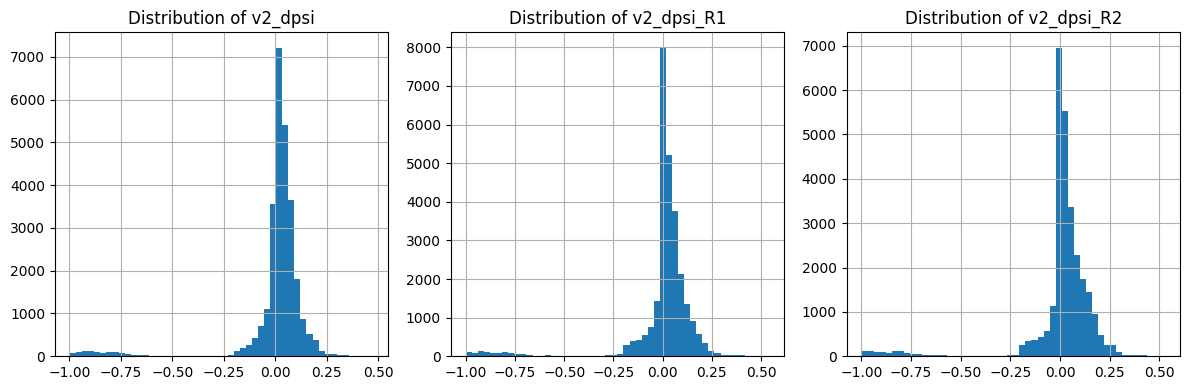

In [7]:
v2_dpsi_range = (df_rows['v2_dpsi'].min(), df_rows['v2_dpsi'].max())
v2_dpsi_R1_range = (df_rows['v2_dpsi_R1'].min(), df_rows['v2_dpsi_R1'].max())
v2_dpsi_R2_range = (df_rows['v2_dpsi_R2'].min(), df_rows['v2_dpsi_R2'].max())

print(f"v2_dpsi range: {v2_dpsi_range}")
print(f"v2_dpsi_R1 range: {v2_dpsi_R1_range}")
print(f"v2_dpsi_R2 range: {v2_dpsi_R2_range}")

import matplotlib.pyplot as plt

# Plot distribution for 'v2_dpsi'
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
df_rows['v2_dpsi'].hist(bins=50)
plt.title('Distribution of v2_dpsi')

# Plot distribution for 'v2_dpsi_R1'
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
df_rows['v2_dpsi_R1'].hist(bins=50)
plt.title('Distribution of v2_dpsi_R1')

# Plot distribution for 'v2_dpsi_R2'
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
df_rows['v2_dpsi_R2'].hist(bins=50)
plt.title('Distribution of v2_dpsi_R2')


plt.tight_layout()
plt.show()


The threshold for dividing the clusters is: -0.38913809480408856


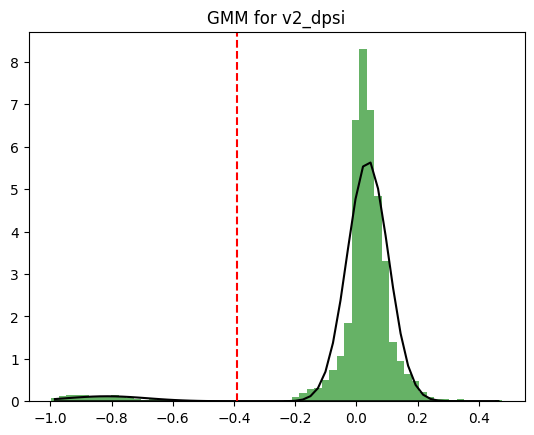

In [45]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import norm
# Assuming 'df_rows' is your DataFrame and 'v2_dpsi' is the column you want to analyze
data = df_rows['v2_dpsi'].values.reshape(-1, 1)  # Reshape data for sklearn which expects 2D array

# Fit a Gaussian mixture with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data)

# Predict the cluster for each data point
clusters = gmm.predict(data)

# Sort the cluster centers
sorted_centers = np.sort(gmm.means_.flatten())

# Find the threshold as the midpoint between the two cluster centers
threshold = np.mean(sorted_centers)

# Print the threshold
print(f"The threshold for dividing the clusters is: {threshold}")

# Optional: Plot the data and the Gaussian curves
hist, bins = np.histogram(data, bins=60, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.hist(data, bins=60, density=True, alpha=0.6, color='g')

# Add Gaussian curves to the histogram
for mean, covar, weight in zip(gmm.means_.flatten(), gmm.covariances_.flatten(), gmm.weights_.flatten()):
    pdf = weight * norm(mean, np.sqrt(covar)).pdf(bin_centers)
    plt.plot(bin_centers, pdf, '-k')

plt.axvline(x=threshold, color='r', linestyle='--')
plt.title('GMM for v2_dpsi')
plt.show()


In [7]:
# Change 'exon' to 1 and others to 0 in the 'label' column
#df_rows['label'] = df_rows['label'].apply(lambda x: 1 if x == 'exon' else 0)
#df_rows.rename(columns={'label': 'labels'}, inplace=True)
#print(df_rows)
threshold = -0.5
df_rows['labels'] = (df_rows['v2_dpsi'] <= threshold).astype(int)
print(df_rows)
# Count the occurrence of each unique value in the 'labels' column
label_counts = df_rows['labels'].value_counts()

# Print the counts
print(label_counts)


      ref_allele alt_allele  \
1              C          T   
3              C          T   
4              C          T   
5              G          T   
6              G          A   
...          ...        ...   
32664          C          T   
32665          T          C   
32666          G          C   
32667          G          C   
32668          G          A   

                                                   seq_b           label  \
1      GAGGGAGCATGCTTCAGGCAGCCCTTCCAGCATCTACCAGCCATGC...    upstr_intron   
3      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
4      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...  downstr_intron   
5      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...            exon   
6      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...            exon   
...                                                  ...             ...   
32664  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...  downstr_intron   
32665  CTTTGCTCACTT

In [8]:
df_final = df_rows[['seq_a', 'seq_b', 'labels']]

In [17]:
import numpy as np
filter = np.load('/common/zhangz2lab/zhanh/SpliceBERT/filter_distance.npy')
print(filter)
filtered_df = df_final[filter]
print(filtered_df)
# Count the occurrence of each unique value in the 'labels' column
label_counts = df_rows['labels'].value_counts()

# Print the counts
print(label_counts)
from sklearn.model_selection import train_test_split
# Split the data into 80% train and 20% temporary test set
df_train, df_temp = train_test_split(filtered_df, test_size=0.2, random_state=42)

# Split the temporary test set into 50% test and 50% validation (10% of total each)
df_test, df_val = train_test_split(df_temp, test_size=0.5, random_state=42)
df_train.to_csv('/common/zhangz2lab/zhanh/MFASS/processed_data/snv_f/train.csv', index=False)
df_test.to_csv('/common/zhangz2lab/zhanh/MFASS/processed_data/snv_f/test.csv', index=False)
df_val.to_csv('/common/zhangz2lab/zhanh/MFASS/processed_data/snv_f/val.csv', index=False)

[ True  True  True ...  True  True  True]
                                                   seq_a  \
1      GAGGGAGCATGCTTCAGGCAGCCCTTCCGGCATCTACCAGCCATGC...   
3      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...   
4      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...   
5      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...   
6      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...   
...                                                  ...   
32664  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...   
32665  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...   
32666  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...   
32667  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...   
32668  CTTTGCTCACTTTCACTCACTCTCTTTTTCATTTCTCCCCCCAGTT...   

                                                   seq_b  labels  
1      GAGGGAGCATGCTTCAGGCAGCCCTTCCAGCATCTACCAGCCATGC...       0  
3      TTTTAAAACCTCTTATACACACCTTGATCTTTTTGTGGCAGGTCTC...       1  
4      TTTTAAAACCTCTTATACACACCTTGATC

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into 80% train and 20% temporary test set
df_train, df_temp = train_test_split(df_final, test_size=0.2, random_state=42)

# Split the temporary test set into 50% test and 50% validation (10% of total each)
df_test, df_val = train_test_split(df_temp, test_size=0.5, random_state=42)

# Save the DataFrames to CSV files
df_train.to_csv('/common/zhangz2lab/zhanh/MFASS/processed_data/snv/train.csv', index=False)
df_test.to_csv('/common/zhangz2lab/zhanh/MFASS/processed_data/snv/test.csv', index=False)
df_val.to_csv('/common/zhangz2lab/zhanh/MFASS/processed_data/snv/val.csv', index=False)


In [5]:
import pandas as pd
df_test = pd.read_csv('/common/zhangz2lab/zhanh/MFASS/processed_data/snv_f/test.csv')
#df_test.to_csv('/common/zhangz2lab/zhanh/MFASS/processed_data/snv_f/test.csv')
#df_val.to_csv('/common/zhangz2lab/zhanh/MFASS/processed_data/snv_f/val.csv')
#value_counts = df_train['true_labels_callback'].value_counts()
#print(value_counts)
df_test
value_counts = df_test['labels'].value_counts()
print(value_counts)

labels
0    2664
1      88
Name: count, dtype: int64
